![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.head()  # vemos los 5 primeros datos del dataframe

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
print(df.info())
print(df['fetal_health'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Por ahora se dejará la data desbalanceada

In [16]:
print(df.isnull().any())

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

No hay valores nulos

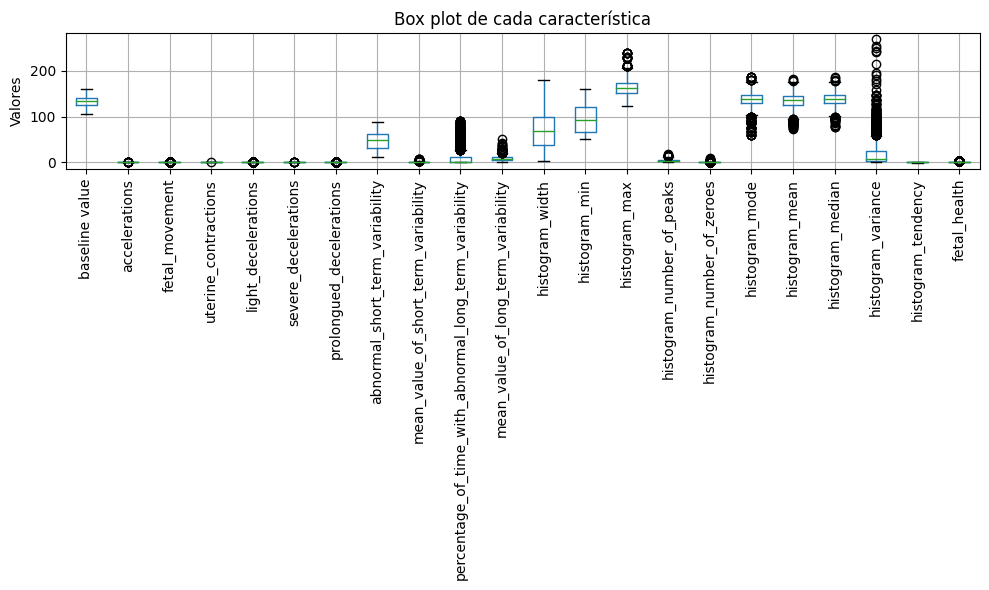

In [33]:
#Analizamos la distribución de los valores antes de decidir qué variables se mantendrán
plt.figure(figsize=(10, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Box plot de cada característica')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

<Axes: >

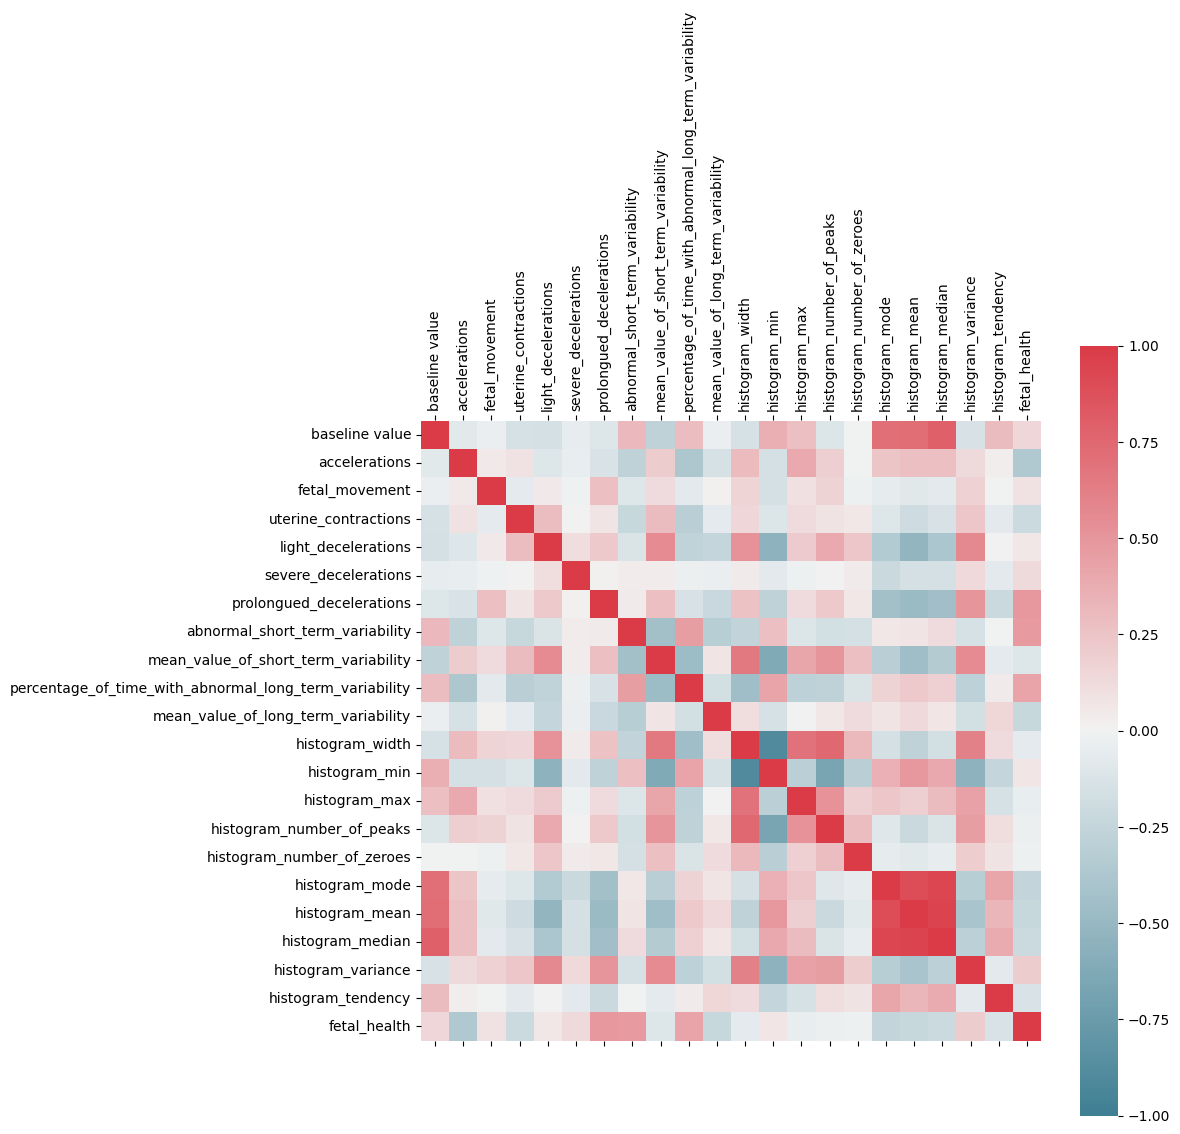

In [23]:
#correlación entre las variables
import seaborn as sns

corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

sns.heatmap(corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin = -1.0, vmax=1.0,
            square=True, ax=ax)

# Obrservamos que hay algunas variables (como histogram_mode, histogram_mean e histogram_median que tienen alta correlación entre si)

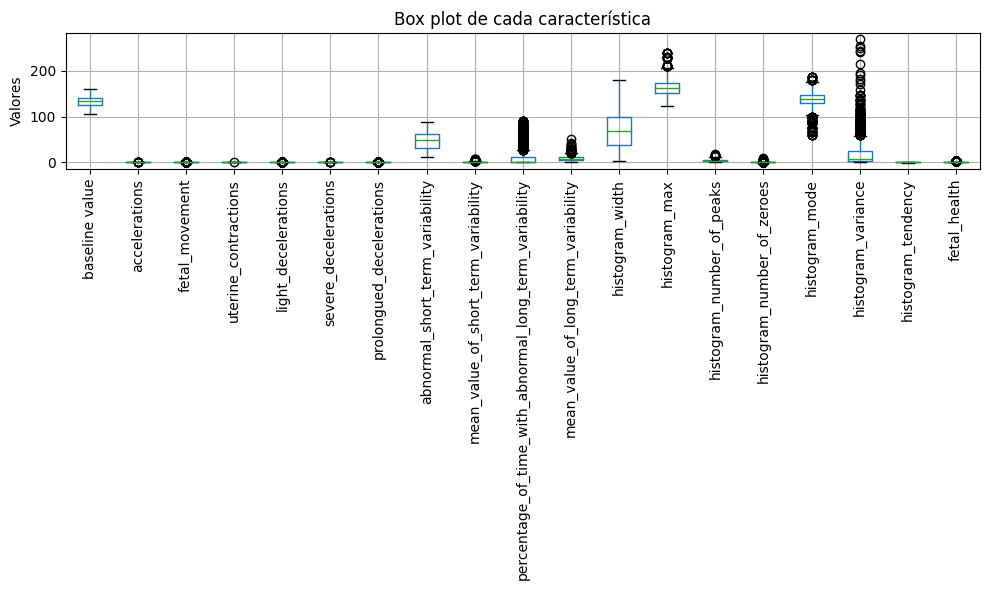

In [32]:
# se eliminarán las variables que tengan mayor correlación entre si
# se considera un valor de correlación mayor a 0.8, es decir que se eliminarán aquellas que tengan correlación mayor a 0.8
matriz_correlacion = df.corr().abs()
mask = matriz_correlacion.mask(np.tril(np.ones(matriz_correlacion.shape)).astype(bool))
columnas_a_eliminar = [columna for columna in mask.columns if any(mask[columna] > 0.8)]
df_sin_correlacion = df.drop(columnas_a_eliminar, axis=1)

plt.figure(figsize=(10, 6))
df_sin_correlacion.boxplot()
plt.xticks(rotation=90)
plt.title('Box plot de cada característica')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y variable objetivo (y)
X = df_sin_correlacion.drop('fetal_health', axis=1)
y = df_sin_correlacion['fetal_health']

# Se dividirán los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (1700, 18)
Forma de X_test: (426, 18)
Forma de y_train: (1700,)
Forma de y_test: (426,)


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Árbol de Decisión 1
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf1.fit(X_train, y_train)
y_pred_tree1 = tree_clf1.predict(X_test)
accuracy_tree1 = accuracy_score(y_test, y_pred_tree1)

f1 = f1_score(y_test, y_pred_tree1, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_tree1)

print("Precisión 1:", accuracy_tree1)
print("Puntaje F1:", f1)
print("Matriz de confusión:")
print(conf_matrix)


tree_clf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(tree_clf, X, y, cv=5, scoring='accuracy')
print("Precisión promedio:", scores.mean())

# :(( el modelo tiene más accuracy del que deberia

Precisión 1: 0.9272300469483568
Puntaje F1: 0.9287964135120524
Matriz de confusión:
[[314  18   1]
 [  8  54   2]
 [  2   0  27]]
Precisión promedio: 0.8330140845070423


In [56]:
# Árbol de Decisión 2
tree_clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf2.fit(X_train, y_train)
y_pred_tree2 = tree_clf2.predict(X_test)

accuracy_tree2 = accuracy_score(y_test, y_pred_tree2)
f1_2 = f1_score(y_test, y_pred_tree2, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_tree2)

print("Precisión 2:", accuracy_tree2)
print("Puntaje F1:", f1_2)
print("Matriz de confusión:")
print(conf_matrix)


Precisión 2: 0.9366197183098591
Puntaje F1: 0.9335118501521242
Matriz de confusión:
[[327   5   1]
 [ 17  44   3]
 [  1   0  28]]


In [50]:
from sklearn.neighbors import KNeighborsClassifier

k = len(df['fetal_health'].unique())
knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Precisión:", accuracy_knn)

knn_clf = KNeighborsClassifier()
scores = cross_val_score(knn_clf, X, y, cv=5, scoring='accuracy')
print("Precisión promedio:", scores.mean())


Precisión: 0.8802816901408451
Precisión promedio: 0.8212526926263463
